<a href="https://colab.research.google.com/github/mimomaina/Machinelearning001/blob/main/Health_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages


In [ ]:
#basic packages
import numpy as np
import pandas as pd
import missingno as msno
#visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score



# Load dataset

In [ ]:
df = pd.read_excel('/content/Healthcare Dataset.xlsx')

# Data exploration and cleaning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6158 entries, 0 to 6157
Data columns (total 32 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype         
---  ------                                                                                                                      --------------  -----         
 0   Location                                                                                                                    5805 non-null   object        
 1   _Location_latitude                                                                                                          5805 non-null   float64       
 2   _Location_longitude                                                                                                         5805 non-null   float64       
 3   _Location_altitude                                                                      

In [ ]:
#rename columns
# Dictionary mapping old column names to new ones
column_rename_map = {
    "_Location_latitude": "Latitude",
    "_Location_longitude": "Longitude",
    "_Location_altitude": "Altitude",
    "_Location_precision": "Precision",
    "Date and Time": "DateTime",
    "How many children do you have, if any?": "NumChildren",
    "Monthly Household Income": "HouseholdIncome",
    "Have you ever had health insurance?": "HadInsurance",
    "If yes, which insurance cover?": "InsuranceType",
    "When was the last time you visited a hospital for medical treatment? (In Months)": "LastHospitalVisitMonths",
    "Did you have health insurance during your last hospital visit?": "InsuranceDuringVisit",
    "Have you ever had a routine check-up with a doctor or healthcare provider?": "RoutineCheckup",
    "If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?": "RoutineCheckupIntervalYears",
    "Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?": "HadCancerScreening",
    "If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?": "CancerScreeningIntervalYears",
    "Your Picture": "Picture",
    "Your Picture_URL": "PictureURL",
    "_submission_time": "SubmissionTime",
    "_validation_status": "ValidationStatus",
    "_submitted_by": "SubmittedBy",
    "_tags": "Tags",
    "_id": "ID",
    "_uuid": "UUID",
    "__version__": "Version",
    "_index": "Index",
    "_notes": "Notes",
    "_status": "Status"
}



df.rename(columns=column_rename_map, inplace=True)

print(df.columns)


Index(['Location', 'Latitude', 'Longitude', 'Altitude', 'Precision',
       'DateTime', 'Age', 'Gender', 'Marital Status', 'NumChildren',
       'Employment Status', 'HouseholdIncome', 'HadInsurance', 'InsuranceType',
       'LastHospitalVisitMonths', 'InsuranceDuringVisit', 'RoutineCheckup',
       'RoutineCheckupIntervalYears', 'HadCancerScreening',
       'CancerScreeningIntervalYears', 'Picture', 'PictureURL', 'ID', 'UUID',
       'SubmissionTime', 'ValidationStatus', 'Notes', 'Status', 'SubmittedBy',
       'Version', 'Tags', 'Index'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6158 entries, 0 to 6157
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Location                      5805 non-null   object        
 1   Latitude                      5805 non-null   float64       
 2   Longitude                     5805 non-null   float64       
 3   Altitude                      5805 non-null   float64       
 4   Precision                     5805 non-null   float64       
 5   DateTime                      6010 non-null   datetime64[ns]
 6   Age                           6140 non-null   object        
 7   Gender                        6141 non-null   object        
 8   Marital Status                6140 non-null   object        
 9   NumChildren                   5533 non-null   float64       
 10  Employment Status             6134 non-null   object        
 11  HouseholdIncome               

In [ ]:
#delete empty columns
columns_to_delete = ['Picture', 'PictureURL', 'ValidationStatus','Notes', 'Tags']
df.drop(columns=columns_to_delete, inplace=True)

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['UUID', 'Status', 'SubmittedBy', 'Version','SubmissionTime'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6158 entries, 0 to 6157
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Location                      5805 non-null   object        
 1   Latitude                      5805 non-null   float64       
 2   Longitude                     5805 non-null   float64       
 3   Altitude                      5805 non-null   float64       
 4   Precision                     5805 non-null   float64       
 5   DateTime                      6010 non-null   datetime64[ns]
 6   Age                           6140 non-null   object        
 7   Gender                        6141 non-null   object        
 8   Marital Status                6140 non-null   object        
 9   NumChildren                   5533 non-null   float64       
 10  Employment Status             6134 non-null   object        
 11  HouseholdIncome               

In [ ]:
#percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Location                         5.732381
Latitude                         5.732381
Longitude                        5.732381
Altitude                         5.732381
Precision                        5.732381
DateTime                         2.403378
Age                              0.292303
Gender                           0.276064
Marital Status                   0.292303
NumChildren                     10.149399
Employment Status                0.389737
HouseholdIncome                  4.205911
HadInsurance                     0.308542
InsuranceType                   41.247158
LastHospitalVisitMonths          2.565768
InsuranceDuringVisit             0.909386
RoutineCheckup                   0.373498
RoutineCheckupIntervalYears     71.159467
HadCancerScreening               0.503410
CancerScreeningIntervalYears    74.585905
ID                               0.000000
Index                            0.000000
dtype: float64


In [ ]:
#delete columns with more than 50% missing values
columns_to_delete = missing_percentage[missing_percentage > 50].index
df.drop(columns=columns_to_delete, inplace=True)

In [ ]:
#delete Location
df.drop(columns=['Location'], inplace=True)

<Axes: >

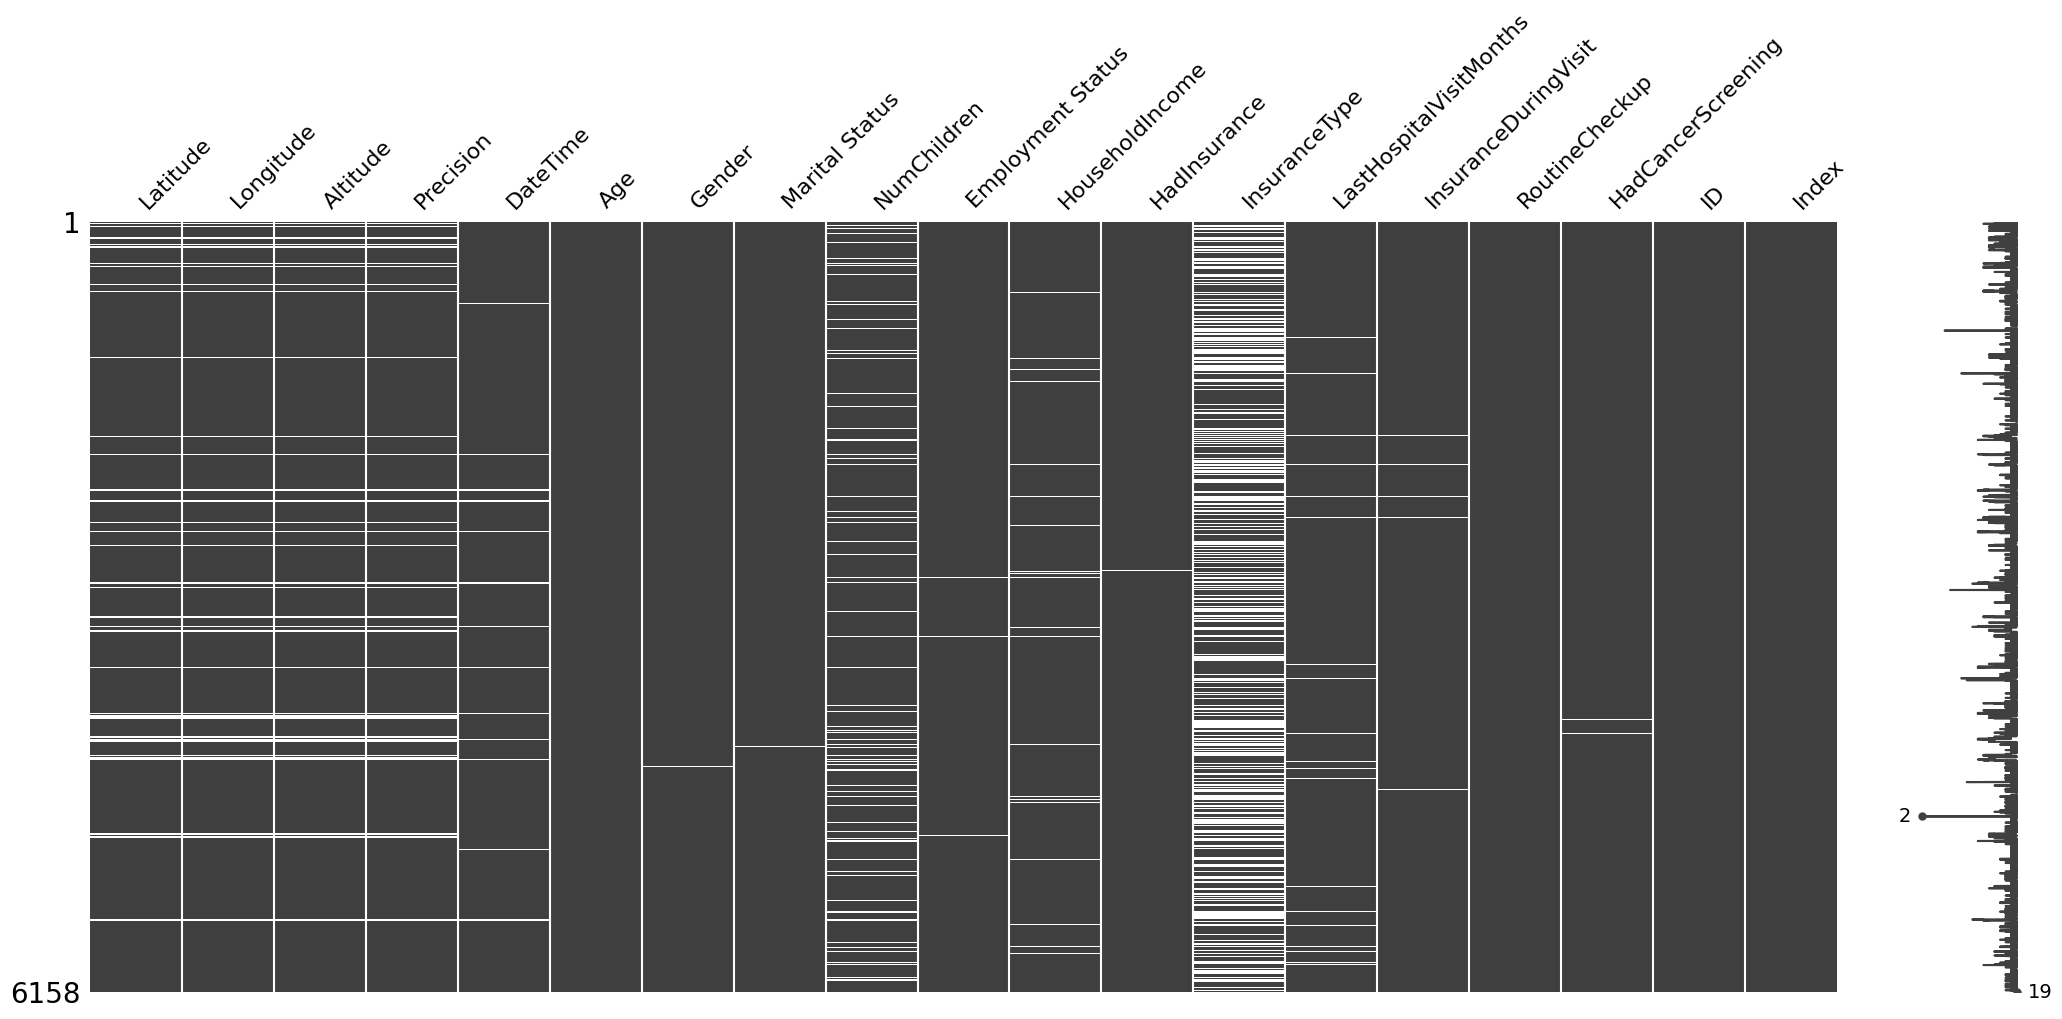

In [ ]:
#missigno matrix
msno.matrix(df)

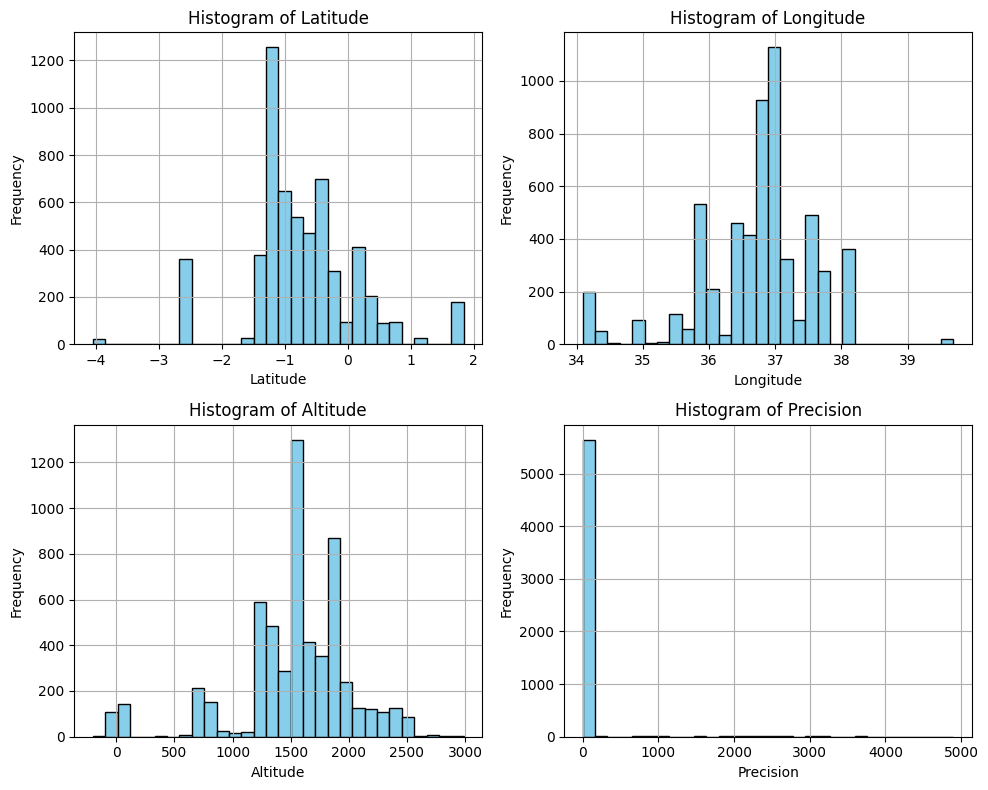

In [ ]:
columns_to_plot = ['Latitude', 'Longitude', 'Altitude', 'Precision',]

# Plotting histograms for each column
plt.figure(figsize=(10, 8))
for i, col in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 2, i)  # Creating a grid of 2x2 subplots
    df[col].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Calculating the mean for Latitude, Longitude, and Altitude
latitude_mean = df['Latitude'].mean()
longitude_mean = df['Longitude'].mean()
altitude_mean = df['Altitude'].mean()

# Calculating the median for Precision
precision_median = df['Precision'].median()

# Printing the calculated values
print(f"Mean of Latitude: {latitude_mean}")
print(f"Mean of Longitude: {longitude_mean}")
print(f"Mean of Altitude: {altitude_mean}")
print(f"Median of Precision: {precision_median}")

# Replacing missing values
df['Latitude'].fillna(latitude_mean, inplace=True)
df['Longitude'].fillna(longitude_mean, inplace=True)
df['Altitude'].fillna(altitude_mean, inplace=True)
df['Precision'].fillna(precision_median, inplace=True)




Mean of Latitude: -0.7378408081176191
Mean of Longitude: 36.71520801648072
Mean of Altitude: 1536.439555222703
Median of Precision: 4.82


<ipython-input-14-cc8cd39507d4>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(latitude_mean, inplace=True)
<ipython-input-14-cc8cd39507d4>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

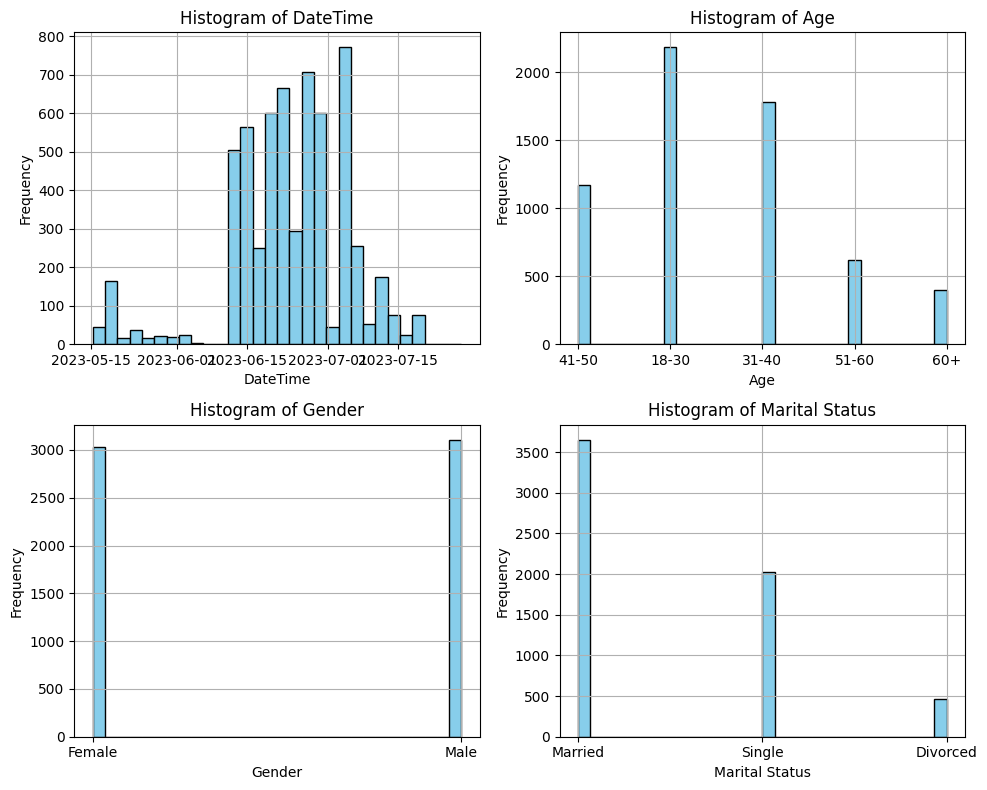

In [ ]:
columns_to_plot03 = ['DateTime','Age','Gender','Marital Status']

# Plotting histograms for each column
plt.figure(figsize=(10, 8))
for i, col in enumerate(columns_to_plot03, start=1):
    plt.subplot(2, 2, i)  # Creating a grid of 2x2 subplots
    df[col].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

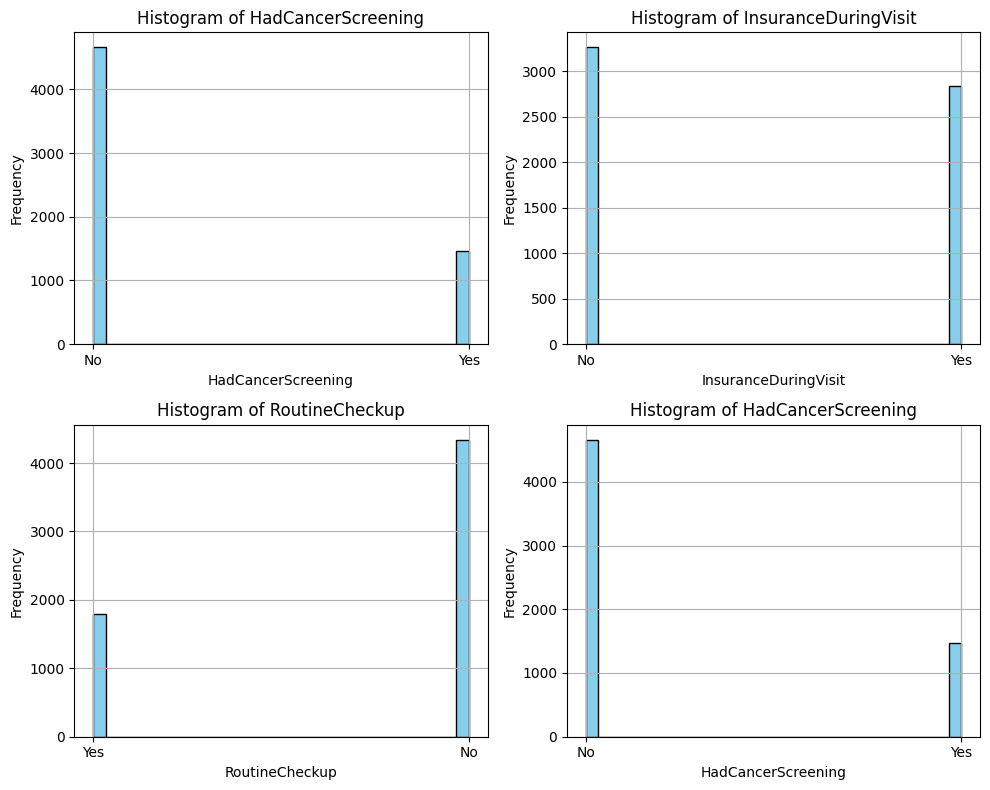

In [ ]:
columns_to_plot02 = ['HadCancerScreening','InsuranceDuringVisit','RoutineCheckup','HadCancerScreening']

# Plotting histograms for each column
plt.figure(figsize=(10, 8))
for i, col in enumerate(columns_to_plot02, start=1):
    plt.subplot(2, 2, i)  # Creating a grid of 2x2 subplots
    df[col].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

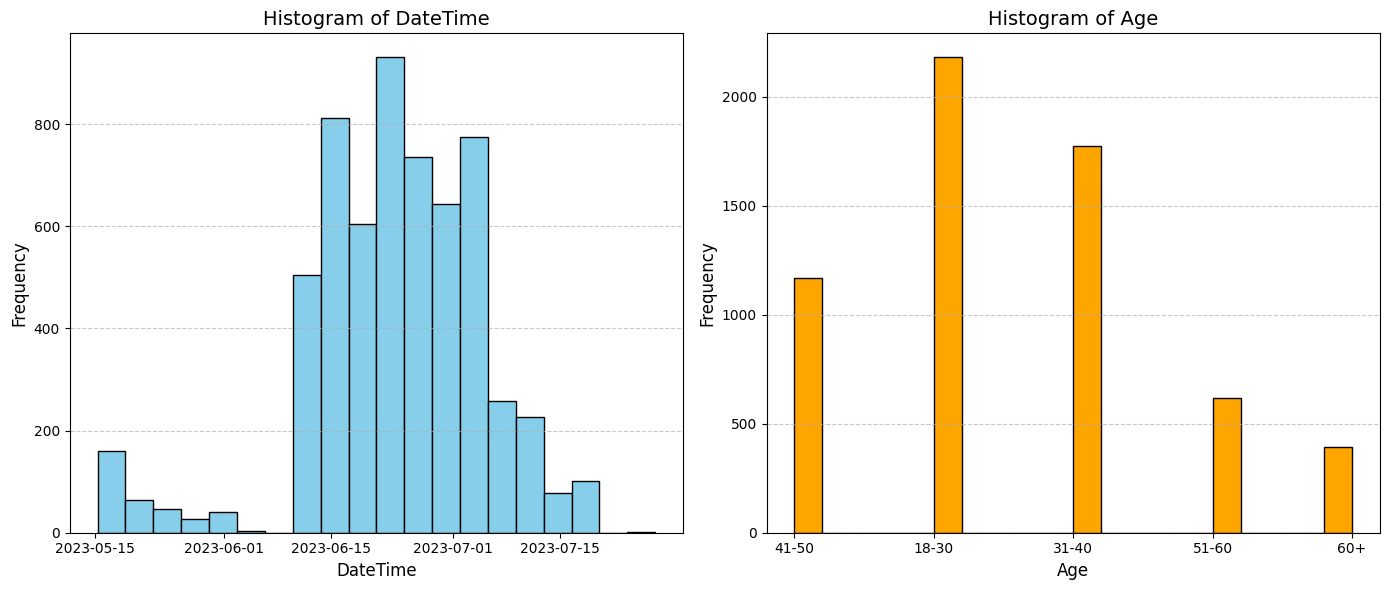

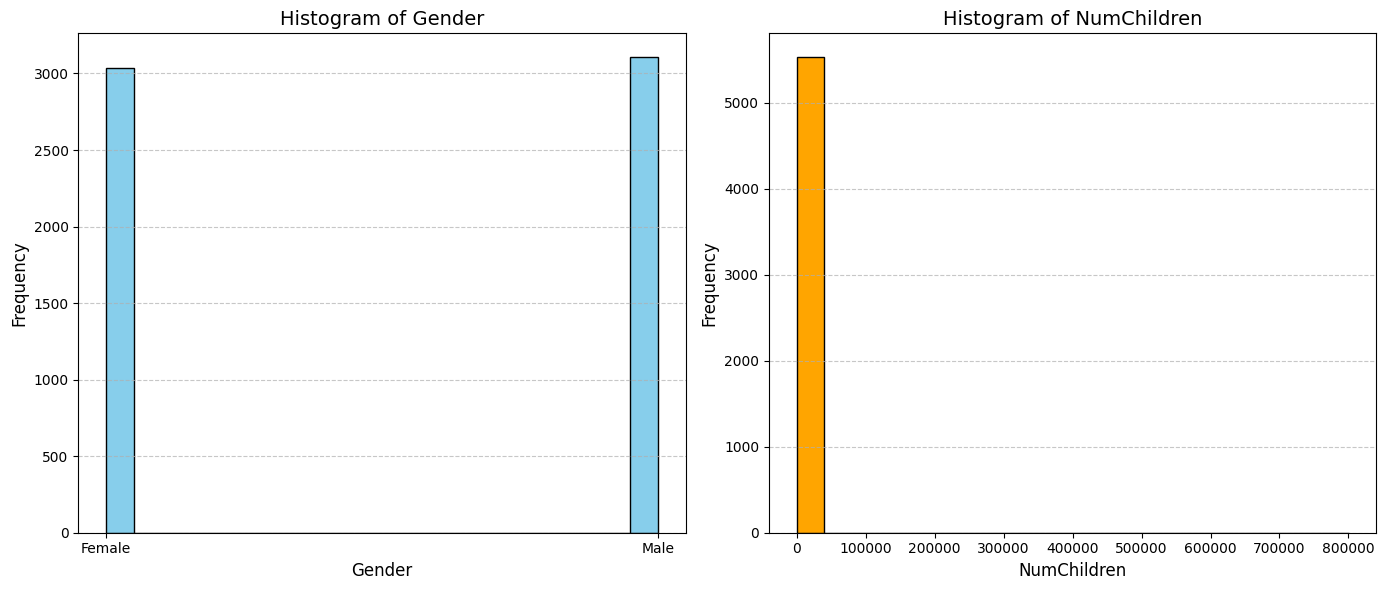

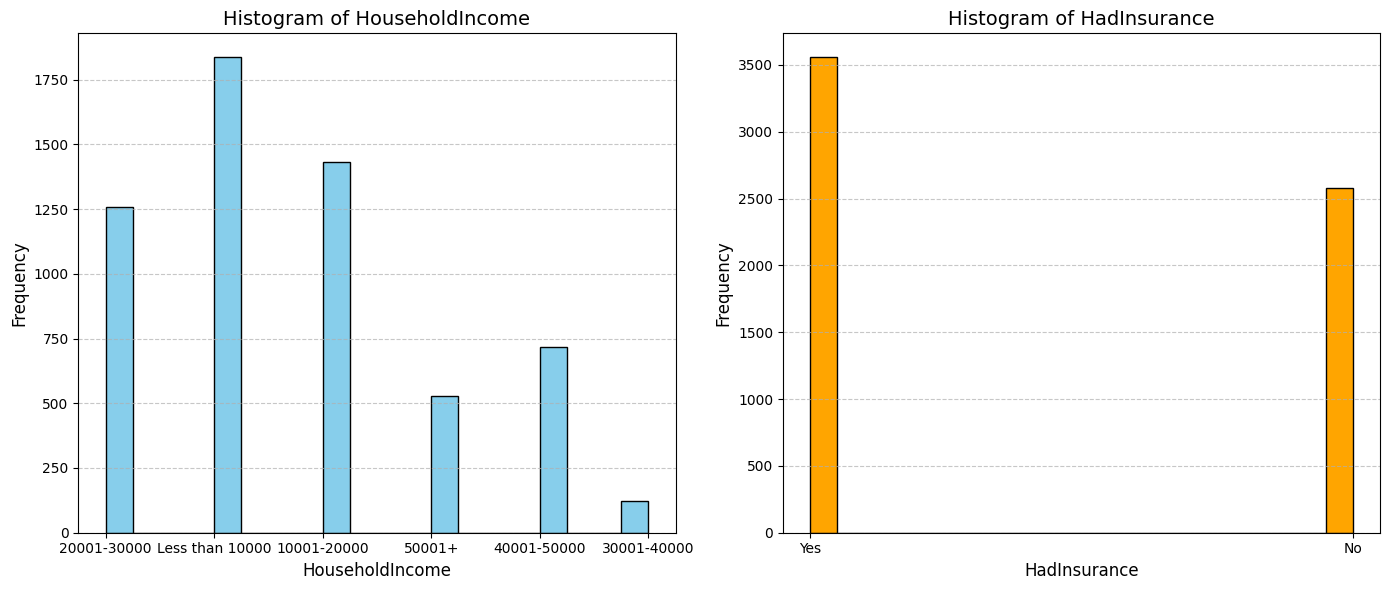

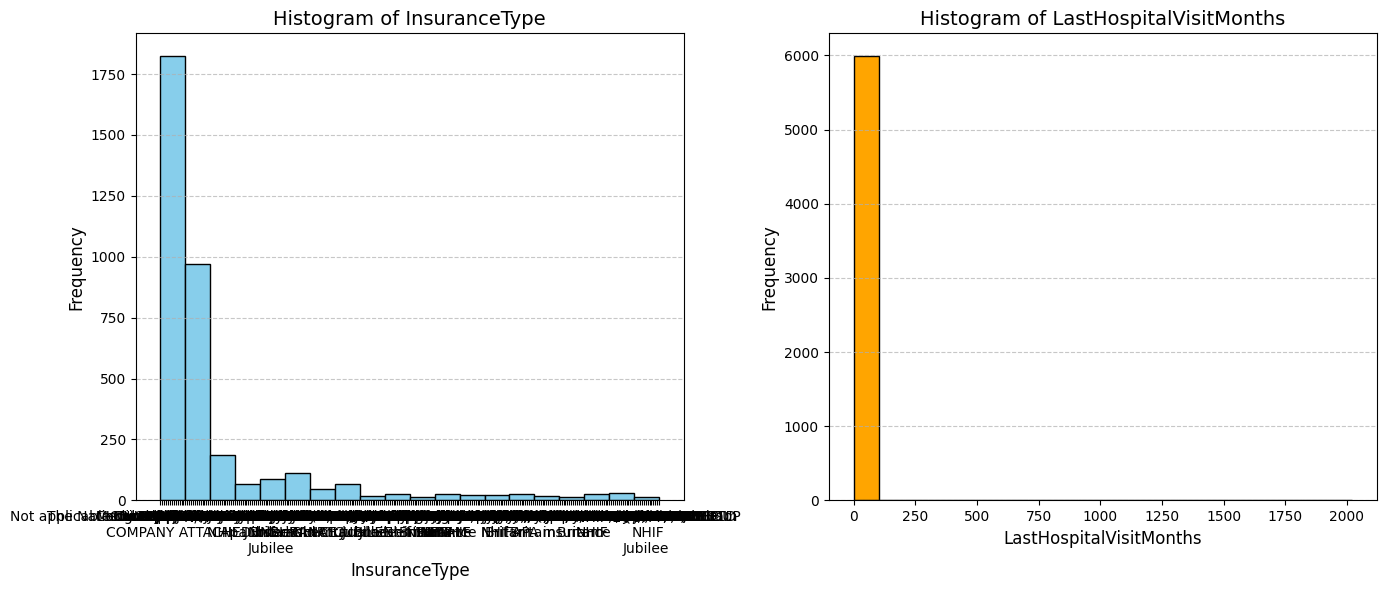

In [ ]:
columns = [
    ('DateTime', 'Age'),
    ('Gender', 'NumChildren'),
    ('HouseholdIncome', 'HadInsurance'),
    ('InsuranceType', 'LastHospitalVisitMonths'),
]
for col1, col2 in columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    axes[0].hist(df[col1].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Histogram of {col1}', fontsize=14)
    axes[0].set_xlabel(col1, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    axes[1].hist(df[col2].dropna(), bins=20, color='orange', edgecolor='black')
    axes[1].set_title(f'Histogram of {col2}', fontsize=14)
    axes[1].set_xlabel(col2, fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



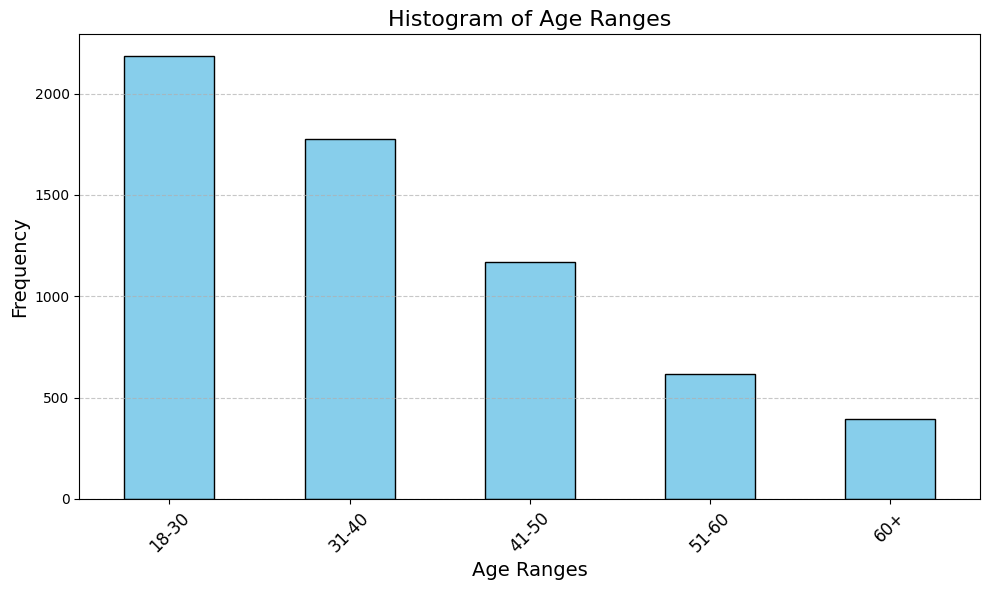

In [ ]:
age_order = ['18-30', '31-40', '41-50', '51-60', '60+']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Plot the histogram
plt.figure(figsize=(10, 6))
df['Age'].value_counts(sort=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Customizing the plot
plt.title('Histogram of Age Ranges', fontsize=16)
plt.xlabel('Age Ranges', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

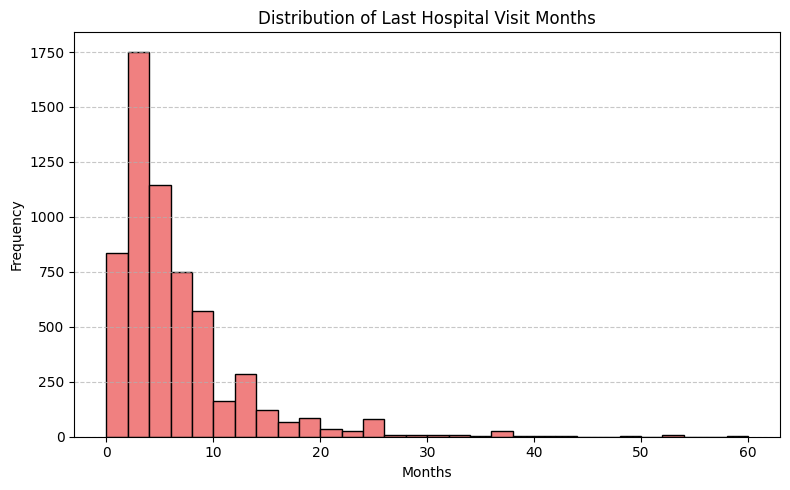

In [ ]:
# Remove outliers before plotting
filtered_data = df['LastHospitalVisitMonths'][(df['LastHospitalVisitMonths'] <= 60)]

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(filtered_data, bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Last Hospital Visit Months')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


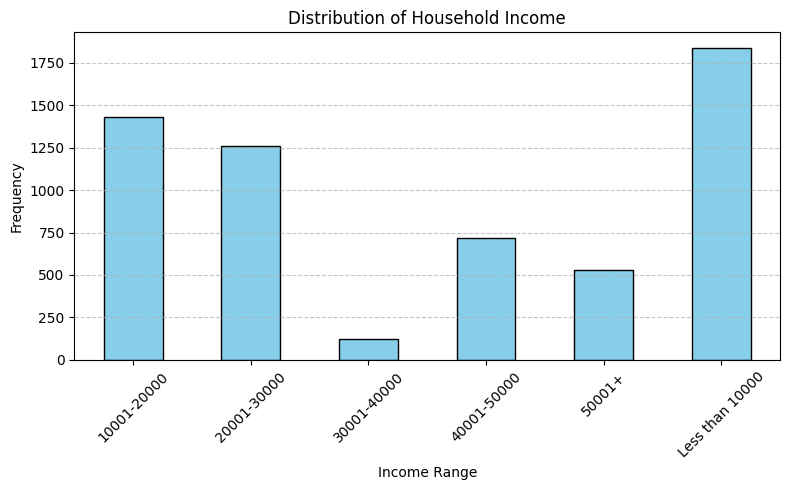

In [ ]:
# Plot the histogram
plt.figure(figsize=(8, 5))
df['HouseholdIncome'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Household Income')
plt.xlabel('Income Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


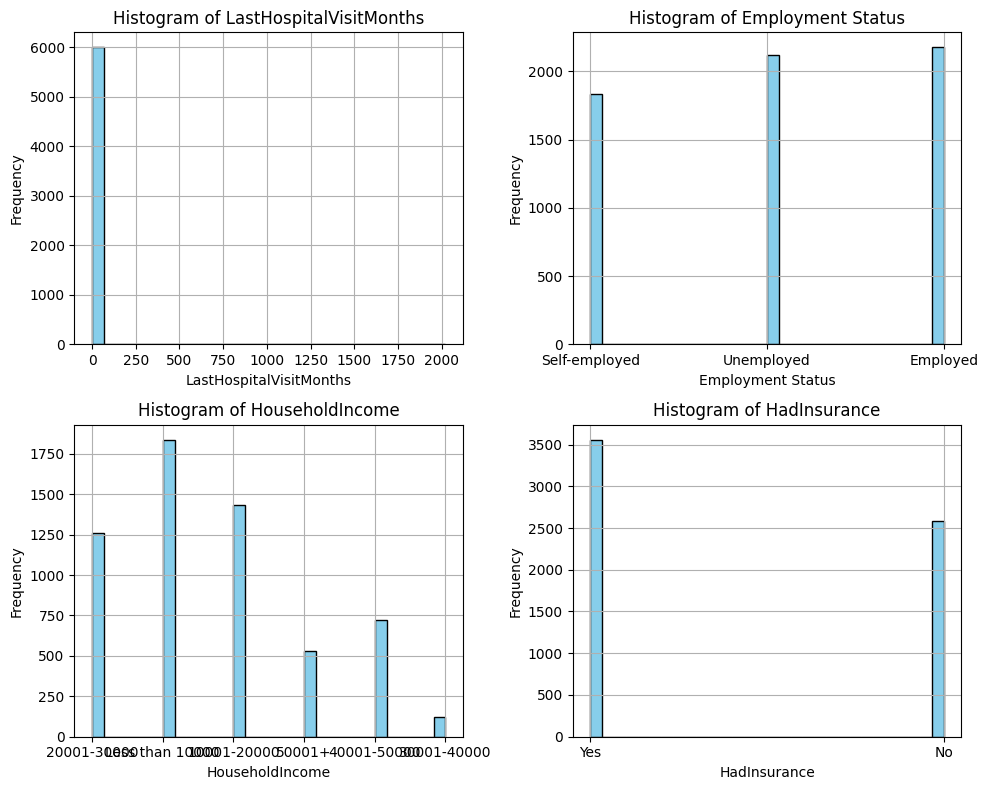

In [ ]:
columns_to_plot01 = ['LastHospitalVisitMonths','Employment Status','HouseholdIncome','HadInsurance']

# Plotting histograms for each column
plt.figure(figsize=(10, 8))
for i, col in enumerate(columns_to_plot01, start=1):
    plt.subplot(2, 2, i)  # Creating a grid of 2x2 subplots
    df[col].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Filter columns with 'Yes' or 'No' values only
yes_no_columns = df.columns[df.apply(lambda col: col.dropna().isin(['Yes', 'No']).all())]
yes_no_df = df[yes_no_columns]

print("Columns with 'Yes' or 'No' values:\n", yes_no_columns.tolist())
print(yes_no_df.head())


Columns with 'Yes' or 'No' values:
 ['HadInsurance', 'InsuranceDuringVisit', 'RoutineCheckup', 'HadCancerScreening']
  HadInsurance InsuranceDuringVisit RoutineCheckup HadCancerScreening
0          Yes                   No            Yes                 No
1           No                   No            Yes                 No
2           No                  Yes             No                Yes
3          Yes                  Yes             No                 No
4          Yes                  Yes             No                Yes


In [ ]:
df['HadInsurance'].fillna(df['HadInsurance'].mode()[0], inplace=True)

<ipython-input-23-e1377739bbc1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HadInsurance'].fillna(df['HadInsurance'].mode()[0], inplace=True)


In [ ]:
df['InsuranceDuringVisit'].fillna(df['InsuranceDuringVisit'].mode()[0], inplace=True)

<ipython-input-24-8f0f81d263c5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['InsuranceDuringVisit'].fillna(df['InsuranceDuringVisit'].mode()[0], inplace=True)


In [ ]:
df['RoutineCheckup'].fillna(df['RoutineCheckup'].mode()[0], inplace=True)

<ipython-input-25-597a2c949439>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RoutineCheckup'].fillna(df['RoutineCheckup'].mode()[0], inplace=True)


In [ ]:
df['HadCancerScreening'].fillna(df['HadCancerScreening'].mode()[0], inplace=True)

<ipython-input-26-e6b81b8946a1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HadCancerScreening'].fillna(df['HadCancerScreening'].mode()[0], inplace=True)


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

<ipython-input-27-90613879d37d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [ ]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(non_numeric_columns)
filtered_columns = [col for col in non_numeric_columns if col not in yes_no_columns]
non_numeric_df = df[filtered_columns]
non_numeric_df.head()

Index(['Gender', 'Marital Status', 'Employment Status', 'HouseholdIncome',
       'HadInsurance', 'InsuranceType', 'InsuranceDuringVisit',
       'RoutineCheckup', 'HadCancerScreening'],
      dtype='object')


,Gender,Marital Status,Employment Status,HouseholdIncome,InsuranceType
0,Female,Married,Self-employed,20001-30000,Nhif
1,Male,Single,Unemployed,Less than 10000,NaN
2,Female,Married,Self-employed,20001-30000,Nhif
3,Male,Single,Self-employed,10001-20000,Nhif
4,Male,Married,Self-employed,20001-30000,Nhif


In [ ]:
# One-Hot Encode Marital Status
df = pd.get_dummies(df, columns=['Marital Status'], drop_first=True, dtype=int)


In [ ]:
# One-Hot Encode Employment Status
df = pd.get_dummies(df, columns=['Employment Status'], drop_first=True,dtype=int)


In [ ]:
#One-hot encode InsuranceDuringVisit
df = pd.get_dummies(df, columns=['InsuranceDuringVisit'], drop_first=True,dtype=int)


In [ ]:
#One-Hot Encode RoutineCheckup
df = pd.get_dummies(df, columns=['RoutineCheckup'], drop_first=True,dtype=int)

In [ ]:
#One-Hot Encodde HadCancerScreening
df = pd.get_dummies(df, columns=['HadCancerScreening'], drop_first=True,dtype=int)

In [ ]:
# Identify Employment Status columns
employment_columns = ['Employment Status_Self-employed', 'Employment Status_Unemployed']

# Convert boolean columns to integer
df[employment_columns] = df[employment_columns].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6158 entries, 0 to 6157
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Latitude                         6158 non-null   float64       
 1   Longitude                        6158 non-null   float64       
 2   Altitude                         6158 non-null   float64       
 3   Precision                        6158 non-null   float64       
 4   DateTime                         6010 non-null   datetime64[ns]
 5   Age                              6140 non-null   category      
 6   Gender                           6158 non-null   object        
 7   NumChildren                      5533 non-null   float64       
 8   HouseholdIncome                  5899 non-null   object        
 9   HadInsurance                     6158 non-null   object        
 10  InsuranceType                    3618 non-null   object     

In [ ]:
#one hot encode HadInsurance
#df = pd.get_dummies(df, columns=['HadInsurance'], drop_first=True,dtype=int)

In [ ]:
# Retain the original column
df['Original_InsuranceType'] = df['InsuranceType']

# Frequency encoding for InsuranceType
frequency_map = df['InsuranceType'].value_counts().to_dict()
df['InsuranceType_Frequency'] = df['InsuranceType'].map(frequency_map)

# Display the unique values in the new column
print("Unique values in InsuranceType_Frequency:")
print(df['InsuranceType_Frequency'].unique())


Unique values in InsuranceType_Frequency:
[4.01e+02      nan 4.00e+01 1.00e+00 2.00e+00 1.17e+03 1.94e+02 7.00e+00
 1.70e+01 1.00e+01 9.32e+02 2.80e+01 6.00e+00 7.80e+01 3.00e+00 3.70e+01
 1.20e+01 8.00e+00 4.00e+00 2.00e+01 5.00e+00 2.10e+01 2.60e+01 2.30e+01
 1.10e+01 4.30e+01 1.30e+01 9.00e+00]


In [ ]:
# Get all new columns created after one-hot encoding
insurance_type_columns = [col for col in df.columns if 'InsuranceType_' in col]
print("New Insurance Type Columns:")
print(insurance_type_columns)


New Insurance Type Columns:
['InsuranceType_Frequency']


In [ ]:
#percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Latitude                            0.000000
Longitude                           0.000000
Altitude                            0.000000
Precision                           0.000000
DateTime                            2.403378
Age                                 0.292303
Gender                              0.000000
NumChildren                        10.149399
HouseholdIncome                     4.205911
HadInsurance                        0.000000
InsuranceType                      41.247158
LastHospitalVisitMonths             2.565768
ID                                  0.000000
Index                               0.000000
Marital Status_Married              0.000000
Marital Status_Single               0.000000
Employment Status_Self-employed     0.000000
Employment Status_Unemployed        0.000000
InsuranceDuringVisit_Yes            0.000000
RoutineCheckup_Yes                  0.000000
HadCancerScreening_Yes              0.000000
Original_InsuranceType             41.247158
InsuranceT

In [ ]:
#median for InsuranceType column
type_median = df['InsuranceType_Frequency'].median()
print(type_median)

932.0


In [ ]:
#fill in null values with type_median
df['InsuranceType_Frequency'].fillna(type_median, inplace=True)

<ipython-input-41-01424863582f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['InsuranceType_Frequency'].fillna(type_median, inplace=True)


In [ ]:
#Create a mapping of Age ranges to their midpoints
age_mapping = {
    '18-30': 24,
    '31-40': 35,
    '41-50': 45,
    '51-60': 55,
    '60+': 65
}

#Map Age ranges to their numeric midpoints
df['Age_Midpoint'] = df['Age'].map(age_mapping)

#Ensure Age_Midpoint is numeric
df['Age_Midpoint'] = pd.to_numeric(df['Age_Midpoint'], errors='coerce')

#Calculate the median of Age_Midpoint, ignoring NaN values
median_age_midpoint = df['Age_Midpoint'].median()

#Find the corresponding Age range for the median midpoint
median_age_range = None
for age_range, midpoint in age_mapping.items():
    if midpoint == median_age_midpoint:
        median_age_range = age_range
        break

#Fill missing values in the Age column with the median range
df['Age'] = df['Age'].fillna(median_age_range)

# Drop the Age_Midpoint column (cleanup)
#df.drop(columns=['Age_Midpoint'], inplace=True)



In [ ]:
mean_datetime = df['DateTime'].mean()

In [ ]:
#fill null values in DateTime with the mean
df['DateTime'].fillna(mean_datetime, inplace=True)

<ipython-input-44-81527390ab53>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DateTime'].fillna(mean_datetime, inplace=True)


In [ ]:
gender_encoded = pd.get_dummies(df['Gender'], drop_first=True,dtype=int)
df['Gender_Encoded'] = gender_encoded
mean_gender = df['Gender_Encoded'].mean()
df['Gender_Encoded'].fillna(mean_gender, inplace=True)

<ipython-input-45-38166b585f66>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender_Encoded'].fillna(mean_gender, inplace=True)


In [ ]:
#mean Age_Midpoint
mean_age_midpoint = df['Age_Midpoint'].mean()
#fill null values with the mean
df['Age_Midpoint'].fillna(mean_age_midpoint, inplace=True)

<ipython-input-46-b598dd018f63>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age_Midpoint'].fillna(mean_age_midpoint, inplace=True)


In [ ]:
df['InsuranceType'].fillna(df['InsuranceType'].mode()[0], inplace=True)

<ipython-input-47-2599751efe44>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['InsuranceType'].fillna(df['InsuranceType'].mode()[0], inplace=True)


In [ ]:
df['Gender_Encoded'].fillna(df['Gender_Encoded'].mode()[0], inplace=True)

<ipython-input-48-10274519d9de>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender_Encoded'].fillna(df['Gender_Encoded'].mode()[0], inplace=True)


In [ ]:
#delete original Insurancetype
df.drop(columns=['Original_InsuranceType'], inplace=True)

In [ ]:
#median for LastHospitalVisitMonth
visit_median = df['LastHospitalVisitMonths'].median()
#fill null values with median
df['LastHospitalVisitMonths'].fillna(visit_median, inplace=True)

<ipython-input-50-4cc9a0f171a7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LastHospitalVisitMonths'].fillna(visit_median, inplace=True)


In [ ]:
# Create a mapping of income ranges to their midpoints
income_mapping = {
    'Less than 10000': 5000,
    '10000-20000': 15000,
    '20001-30000': 25000,
    '30001-40000': 35000,
    '40001-50000': 45000,
    '50001+': 55000
}

# Map income ranges to their numeric midpoints
df['HouseholdIncome_Midpoint'] = df['HouseholdIncome'].map(income_mapping)

# Ensure HouseholdIncome_Midpoint is numeric
df['HouseholdIncome_Midpoint'] = pd.to_numeric(df['HouseholdIncome_Midpoint'], errors='coerce')

# Calculate the median of HouseholdIncome_Midpoint, ignoring NaN values
median_income_midpoint = df['HouseholdIncome_Midpoint'].median()

# Find the corresponding Household Income range for the median midpoint
median_income_range = None
for income_range, midpoint in income_mapping.items():
    if midpoint == median_income_midpoint:
        median_income_range = income_range
        break

# Fill missing values in the HouseholdIncome column with the median range
df['HouseholdIncome'] = df['HouseholdIncome'].fillna(median_income_range)

# Drop the HouseholdIncome_Midpoint column for cleanup
#df.drop(columns=['HouseholdIncome_Midpoint'], inplace=True)

# Verify the results
print(df[['HouseholdIncome']].isnull().sum())


HouseholdIncome    0
dtype: int64


In [ ]:
#percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Latitude                            0.000000
Longitude                           0.000000
Altitude                            0.000000
Precision                           0.000000
DateTime                            0.000000
Age                                 0.000000
Gender                              0.000000
NumChildren                        10.149399
HouseholdIncome                     0.000000
HadInsurance                        0.000000
InsuranceType                       0.000000
LastHospitalVisitMonths             0.000000
ID                                  0.000000
Index                               0.000000
Marital Status_Married              0.000000
Marital Status_Single               0.000000
Employment Status_Self-employed     0.000000
Employment Status_Unemployed        0.000000
InsuranceDuringVisit_Yes            0.000000
RoutineCheckup_Yes                  0.000000
HadCancerScreening_Yes              0.000000
InsuranceType_Frequency             0.000000
Age_Midpoi

In [ ]:
median_income = df['HouseholdIncome_Midpoint'].median()
df['HouseholdIncome_Midpoint'].fillna(median_income, inplace=True)

<ipython-input-53-a276a09fd34f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HouseholdIncome_Midpoint'].fillna(median_income, inplace=True)


In [ ]:
#mean for NumChidren
mean_children = df['NumChildren'].mean()
#fill null values with mean
df['NumChildren'].fillna(mean_children, inplace=True)

<ipython-input-54-243d0a0b39ca>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumChildren'].fillna(mean_children, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6158 entries, 0 to 6157
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Latitude                         6158 non-null   float64       
 1   Longitude                        6158 non-null   float64       
 2   Altitude                         6158 non-null   float64       
 3   Precision                        6158 non-null   float64       
 4   DateTime                         6158 non-null   datetime64[ns]
 5   Age                              6158 non-null   category      
 6   Gender                           6158 non-null   object        
 7   NumChildren                      6158 non-null   float64       
 8   HouseholdIncome                  6158 non-null   object        
 9   HadInsurance                     6158 non-null   object        
 10  InsuranceType                    6158 non-null   object     

# Explaratory Data Analysis


# Data Visualization

<ipython-input-56-70ec9420a026>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HadInsurance', y='Age', data=df, palette='Set2')


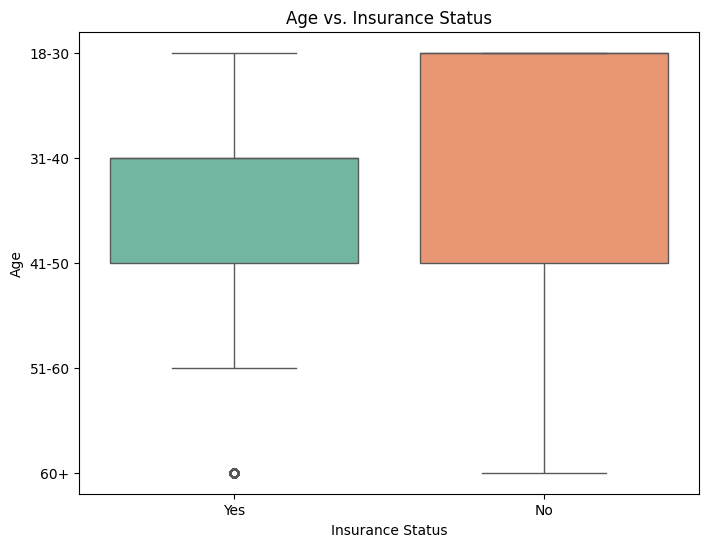

In [ ]:
# Boxplot of age vs. insurance status
plt.figure(figsize=(8, 6))
sns.boxplot(x='HadInsurance', y='Age', data=df, palette='Set2')
plt.title('Age vs. Insurance Status')
plt.xlabel('Insurance Status')
plt.ylabel('Age')
plt.show()


Insurance covers are more popular with people between the ages of 31-40.

<ipython-input-57-0bf53166f95b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HouseholdIncomeCategory', data=df, palette='viridis')


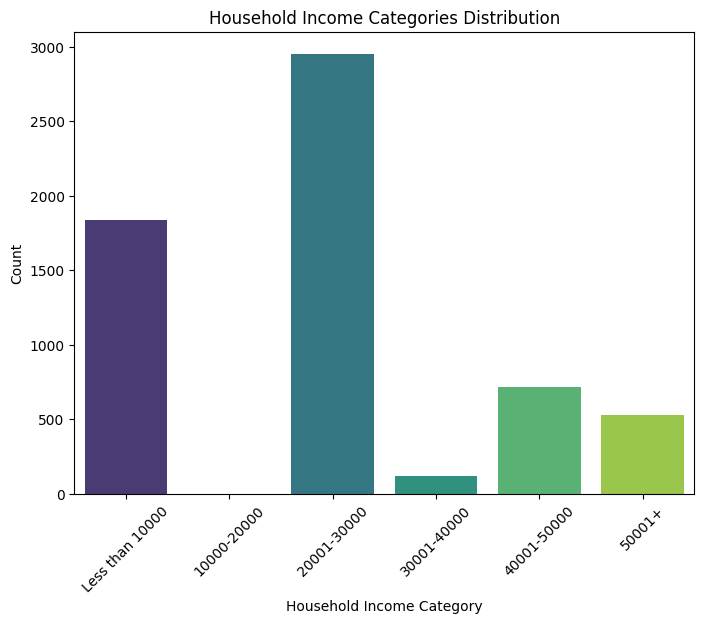

In [ ]:
# Define income categories
income_bins = ['<10000', '10000-20000', '20001-30000', '30001-40000', '40001-50000', '50001+']
income_labels = ['Less than 10000', '10000-20000', '20001-30000', '30001-40000', '40001-50000', '50001+']

# Create a new column for income categories
df['HouseholdIncomeCategory'] = pd.cut(df['HouseholdIncome_Midpoint'],
                                       bins=[0, 10000, 20000, 30000, 40000, 50000, float('inf')],
                                       labels=income_labels)

# Check the distribution of the new income categories
plt.figure(figsize=(8, 6))
sns.countplot(x='HouseholdIncomeCategory', data=df, palette='viridis')
plt.title('Household Income Categories Distribution')
plt.xlabel('Household Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Most households have a monthly income of between 20,001-30,000 followed by a monthly income of less than 10,000.

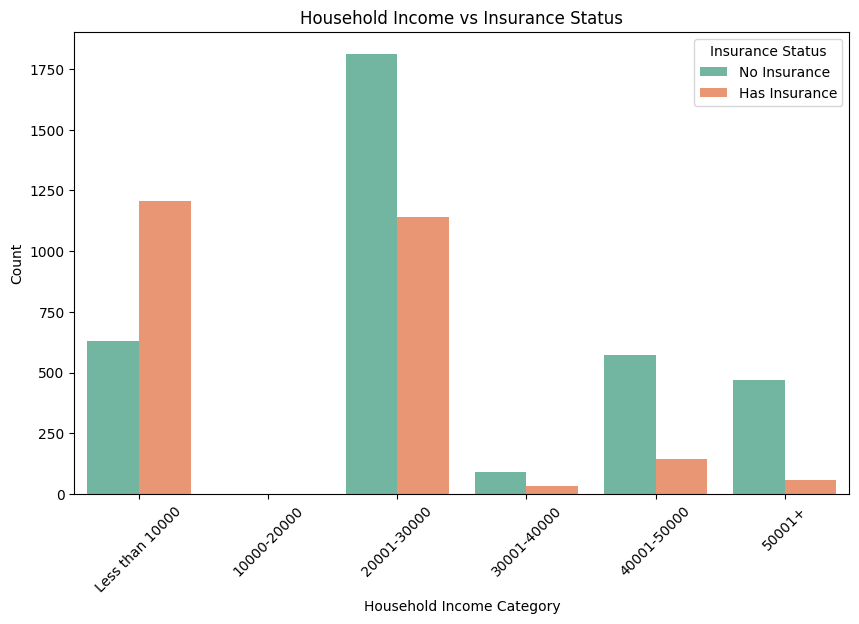

In [ ]:
# Plotting Household Income Category vs Insurance Status
plt.figure(figsize=(10, 6))
sns.countplot(x='HouseholdIncomeCategory', hue='HadInsurance', data=df, palette='Set2')

# Adding titles and labels
plt.title('Household Income vs Insurance Status')
plt.xlabel('Household Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Insurance Status', labels=['No Insurance', 'Has Insurance'])
plt.show()


Most people with insurance covers have a monthly household income of Less tha 10,000. Majority of the households(20,001-30,000) have no insurance cover.

<ipython-input-59-5c4cdca568c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='HouseholdIncome_Midpoint', data=df, palette='coolwarm')


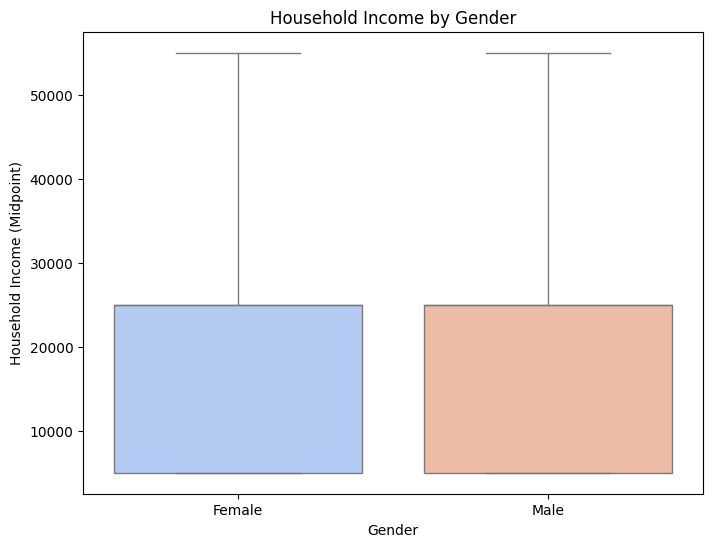

In [ ]:
# Plotting Household Income by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='HouseholdIncome_Midpoint', data=df, palette='coolwarm')
plt.title('Household Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Household Income (Midpoint)')
plt.show()


There isn't a big difference in the contribution of monthly household income between men and women.

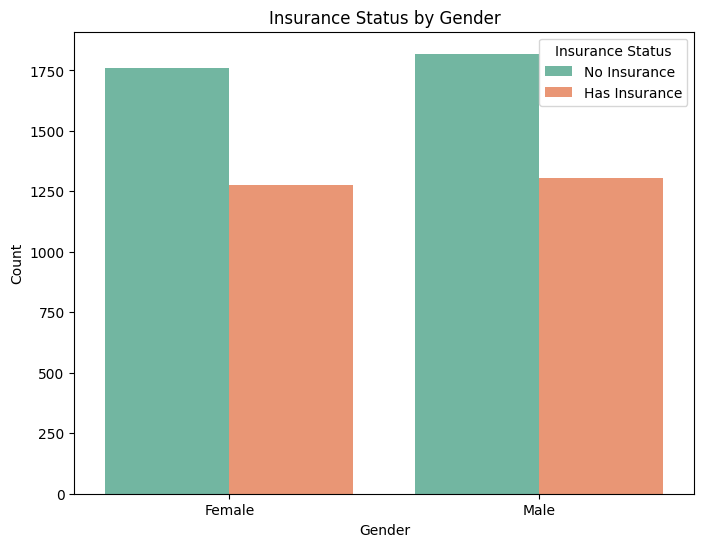

In [ ]:
# Plotting Insurance Status by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='HadInsurance', data=df, palette='Set2')
plt.title('Insurance Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Insurance Status', labels=['No Insurance', 'Has Insurance'])
plt.show()


More men than women have no insurance. The number people with insurance is higher in men than in women.

In [ ]:
# Grouping by Gender and Insurance Status to get counts
gender_insurance_counts = df.groupby(['Gender', 'HadInsurance']).size().unstack(fill_value=0)

# Calculate the difference in insurance status between Females and Males
difference = gender_insurance_counts.loc['Female'] - gender_insurance_counts.loc['Male']

# Display the difference
difference


,0
HadInsurance,
No,-29
Yes,-61


<ipython-input-62-93324ac3a1c4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


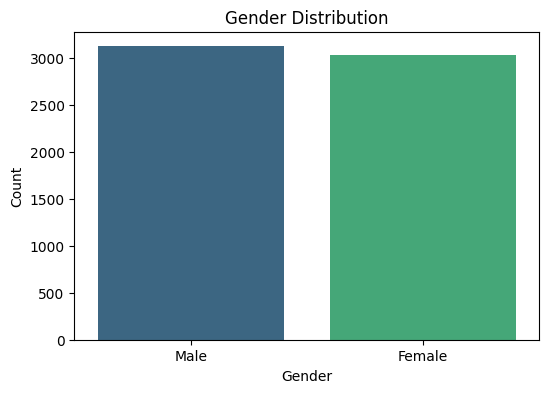

In [ ]:
# Plotting gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


<ipython-input-64-5edae3e5c3a9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NumChildren', y='HadInsurance', data=df, ci=None, palette='magma')
<ipython-input-64-5edae3e5c3a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumChildren', y='HadInsurance', data=df, ci=None, palette='magma')


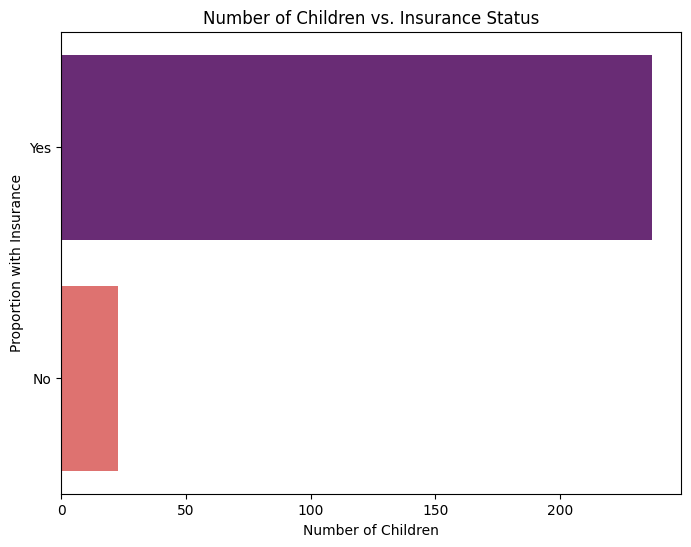

In [ ]:
# Barplot of number of children vs. insurance status
plt.figure(figsize=(8, 6))
sns.barplot(x='NumChildren', y='HadInsurance', data=df, ci=None, palette='magma')
plt.title('Number of Children vs. Insurance Status')
plt.xlabel('Number of Children')
plt.ylabel('Proportion with Insurance')
plt.show()


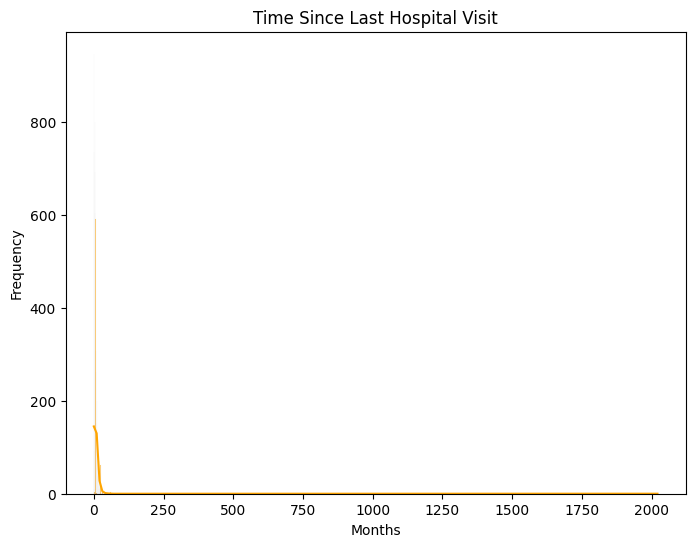

In [ ]:
# Distribution of last hospital visit months
plt.figure(figsize=(8, 6))
sns.histplot(df['LastHospitalVisitMonths'], kde=True, color='orange')
plt.title('Time Since Last Hospital Visit')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show()


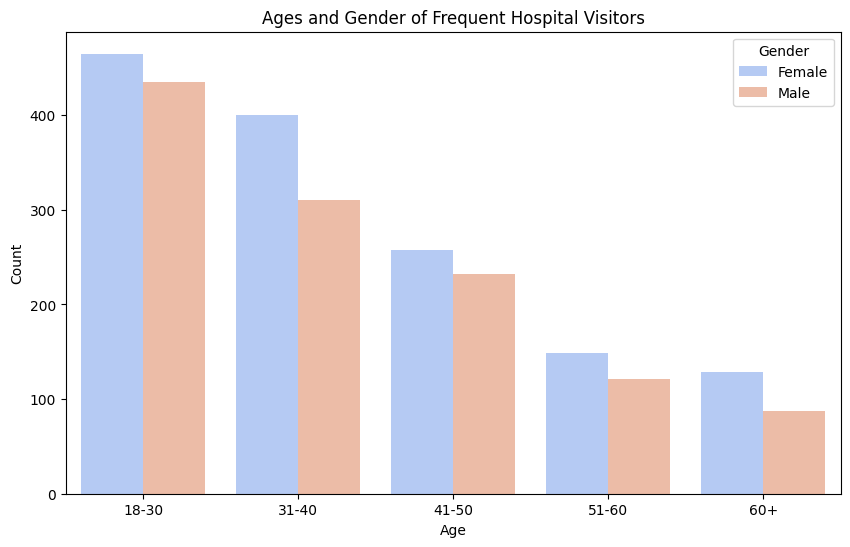

In [ ]:
# Define frequent hospital visitors (e.g., last visit within 1-3 months)
frequent_visitors_df = df[df['LastHospitalVisitMonths'] <= 3]  # Adjust based on your data range

# Gender and Age of Frequent Visitors
plt.figure(figsize=(10, 6))
sns.countplot(
    data=frequent_visitors_df,
    x='Age',
    hue='Gender',
    palette='coolwarm'
)
plt.title('Ages and Gender of Frequent Hospital Visitors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


In [ ]:
# Normalize the column to lowercase
df['InsuranceType'] = df['InsuranceType'].str.lower()

# Replace variations of "nhif" with "NHIF"
df['InsuranceType'] = df['InsuranceType'].replace({
    'nhif': 'NHIF'
})

# Check the updated column
print(df['InsuranceType'].value_counts())


InsuranceType
NHIF                        4126
nhif                        1131
makueni care                  78
britam                        49
jubilee                       47
                            ... 
liason group                   1
800165                         1
not applicable                 1
nhif\njubilee insurance        1
cic insurance group            1
Name: count, Length: 214, dtype: int64


<ipython-input-86-7c58f78dbbd7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_insurance.values, y=top_insurance.index, palette='coolwarm')


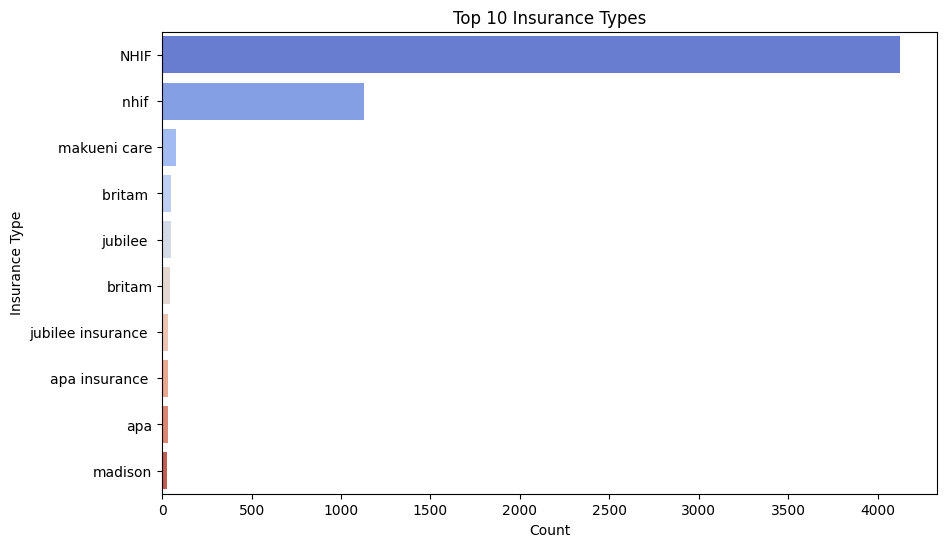

In [ ]:
# 1. Get the top ten insurance types
top_insurance = df['InsuranceType'].value_counts().head(10)

# Plot top insurance types
plt.figure(figsize=(10, 6))
sns.barplot(x=top_insurance.values, y=top_insurance.index, palette='coolwarm')
plt.title('Top 10 Insurance Types')
plt.xlabel('Count')
plt.ylabel('Insurance Type')
plt.show()





In [ ]:
#values in InsuranceType
df['InsuranceType'].value_counts()

,count
InsuranceType,
NHIF,3710
NHIF,932
Nhif,401
Nhif,194
Makueni care,78
...,...
Yes,1
Fitness insurance,1
Mental health and wellness insurance,1


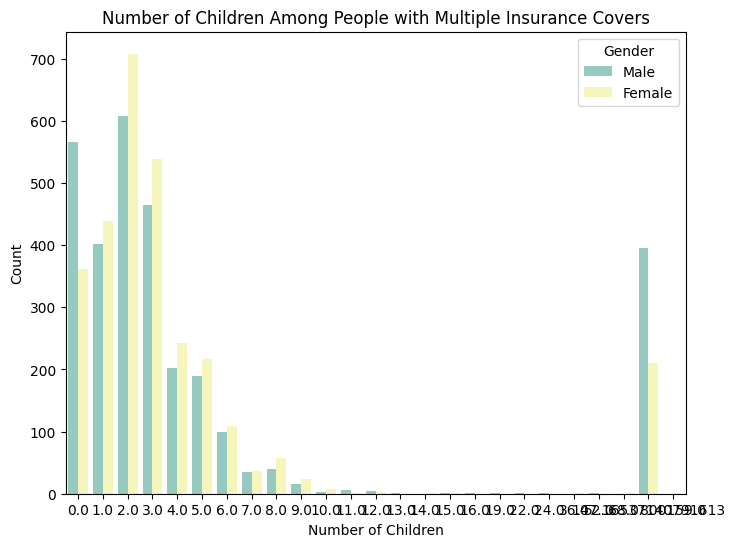

In [ ]:
# Filter for individuals with NHIF and another insurance cover
multiple_insurance_df = df[df['InsuranceType_Frequency'] > 1]  # Assuming this column exists

# Check if they have kids
plt.figure(figsize=(8, 6))
sns.countplot(
    data=multiple_insurance_df,
    x='NumChildren',
    hue='Gender',
    palette='Set3'
)
plt.title('Number of Children Among People with Multiple Insurance Covers')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


# Modelling

In [ ]:
df.info()

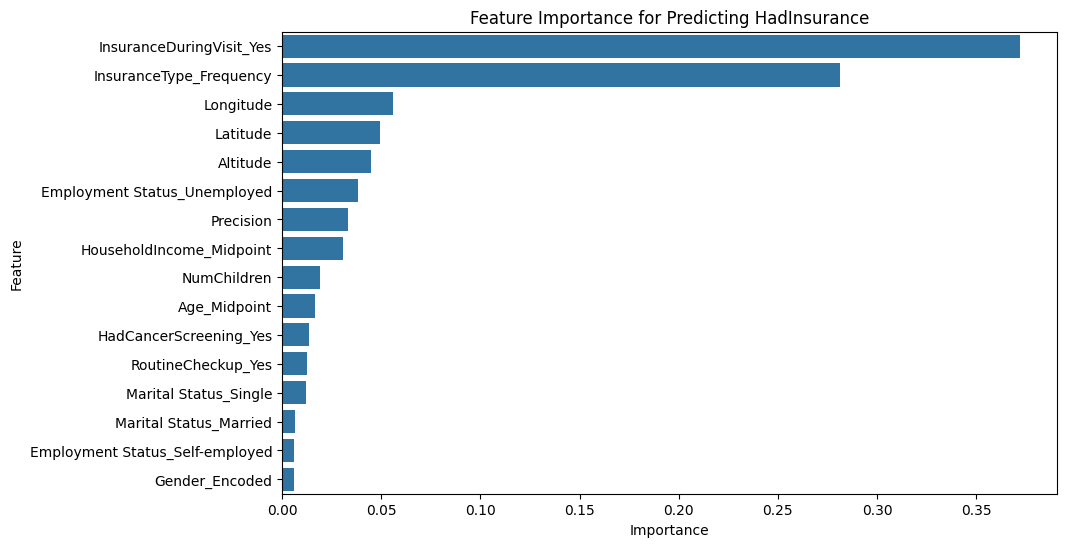

Top Features:
                             Feature  Importance
13         InsuranceDuringVisit_Yes    0.372161
7           InsuranceType_Frequency    0.281453
1                         Longitude    0.056144
0                          Latitude    0.049476
2                          Altitude    0.044877
12     Employment Status_Unemployed    0.038529
3                         Precision    0.033356
5          HouseholdIncome_Midpoint    0.030965
6                       NumChildren    0.019368
4                      Age_Midpoint    0.016428
15           HadCancerScreening_Yes    0.013541
14               RoutineCheckup_Yes    0.012736
10            Marital Status_Single    0.012311
9            Marital Status_Married    0.006454
11  Employment Status_Self-employed    0.006270
8                    Gender_Encoded    0.005934


In [ ]:
# Define initial feature set (excluding ID-like columns and target)
features = [
    'Latitude', 'Longitude', 'Altitude', 'Precision', 'Age_Midpoint',
    'HouseholdIncome_Midpoint', 'NumChildren', 'InsuranceType_Frequency',
    'Gender_Encoded', 'Marital Status_Married', 'Marital Status_Single',
    'Employment Status_Self-employed', 'Employment Status_Unemployed',
    'InsuranceDuringVisit_Yes', 'RoutineCheckup_Yes', 'HadCancerScreening_Yes'
]

# Encode target
df['HadInsurance_Encoded'] = df['HadInsurance'].map({'Yes': 1, 'No': 0})

X = df[features]
y = df['HadInsurance_Encoded']

# Train Random Forest to identify feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Extract and sort feature importances
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance for Predicting HadInsurance')
plt.show()

# Print top features
print("Top Features:\n", feature_importances)


In [ ]:
# Retain only the top features contributing to importance
cumulative_importance = feature_importances['Importance'].cumsum()
top_features = feature_importances.loc[cumulative_importance <= 0.05, 'Feature']

# Subset data with only top features
X_reduced = df[top_features]
print("Selected Features:\n", list(X_reduced.columns))


Selected Features:
 []


In [ ]:
# Create X_reduced using selected important features
selected_features = [
    'InsuranceDuringVisit_Yes',
    'InsuranceType_Frequency',
    c'
]

X_reduced = X[selected_features]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data using X_reduced
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model on reduced feature set
rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(X_train_reduced, y_train)

# Evaluate the model
y_pred_reduced = rf_reduced.predict(X_test_reduced)

# Print accuracy
from sklearn.metrics import accuracy_score
print(f"Accuracy with Reduced Features: {accuracy_score(y_test, y_pred_reduced):.2f}")


Accuracy with Reduced Features: 0.94


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predictions
y_pred_reduced = rf_reduced.predict(X_test_reduced)

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_reduced))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_reduced))



Confusion Matrix:
[[ 722   48]
 [  54 1024]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       770
           1       0.96      0.95      0.95      1078

    accuracy                           0.94      1848
   macro avg       0.94      0.94      0.94      1848
weighted avg       0.94      0.94      0.94      1848



Accuracy: 0.94


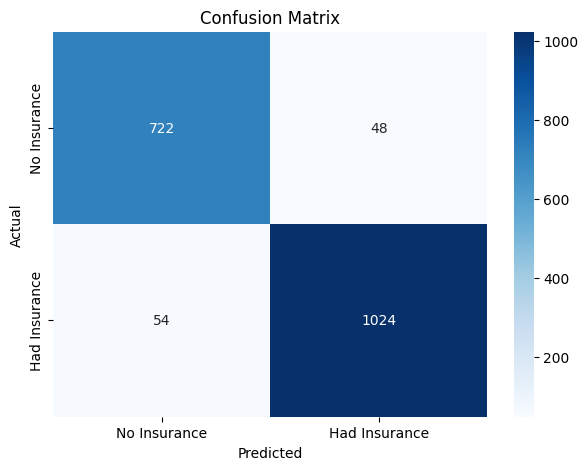

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       770
           1       0.96      0.95      0.95      1078

    accuracy                           0.94      1848
   macro avg       0.94      0.94      0.94      1848
weighted avg       0.94      0.94      0.94      1848



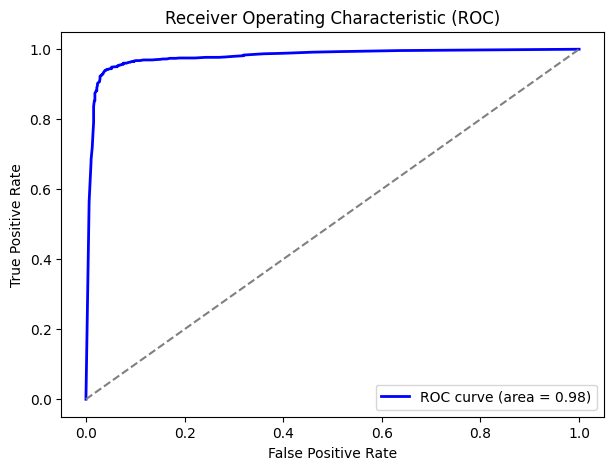

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions on test data
y_pred_reduced = rf_reduced.predict(X_test_reduced)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_reduced)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_reduced)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Insurance', 'Had Insurance'], yticklabels=['No Insurance', 'Had Insurance'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_reduced))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_reduced.predict_proba(X_test_reduced)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


722: Correctly predicted as "No Insurance" (True Negatives).
1024: Correctly predicted as "Had Insurance" (True Positives).
48: Incorrectly predicted as "Had Insurance" when it was actually "No Insurance" (False Positives).
54: Incorrectly predicted as "No Insurance" when it was actually "Had Insurance" (False Negatives).